In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

## Implementation of  Superdense Coding
Implement quantum gates  using superdense coding
Use  an additional qubit as a random bit generator to randomly choose c and d, then run the superdense coding protocol to see that these bits are transmitted correctly.
Running the  simulator shows that Alice and Bob's classical bits always agree.

In [2]:
c = '1'
d = '0'

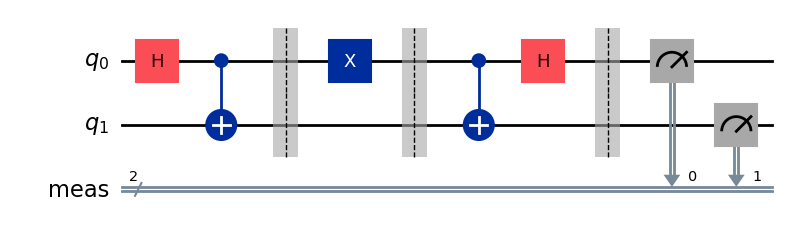

In [3]:
protocol = QuantumCircuit(2)


protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

#alice operations
if d == '1':
    protocol.z(0)
if c == '1':
    protocol.x(0)
protocol.barrier()

#bob actions

protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()


display(protocol.draw('mpl'))

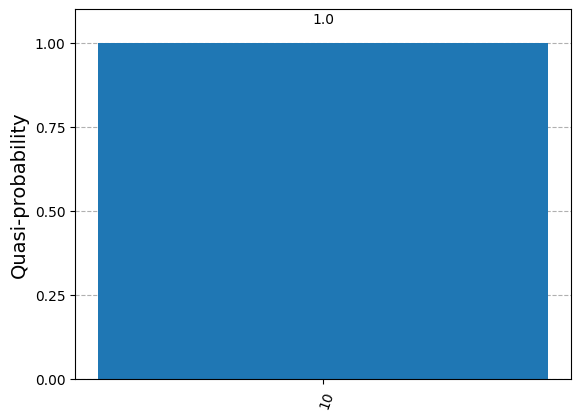

In [4]:
result = Sampler().run(protocol).result()
stats = result.quasi_dists[0].binary_probabilities()
display(plot_histogram(stats))

In [5]:
rbg = QuantumRegister(1, 'randomizer')
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")


Alice_c = ClassicalRegister(1, 'Alice_c')
Alice_d = ClassicalRegister(1, 'Alice_d')

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_c, Alice_d)

#intialize test
test.h(rbg)
test.cx(rbg, ebit0) 
test.barrier()

#use the randomizer to generate Alice's bits c and d

test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

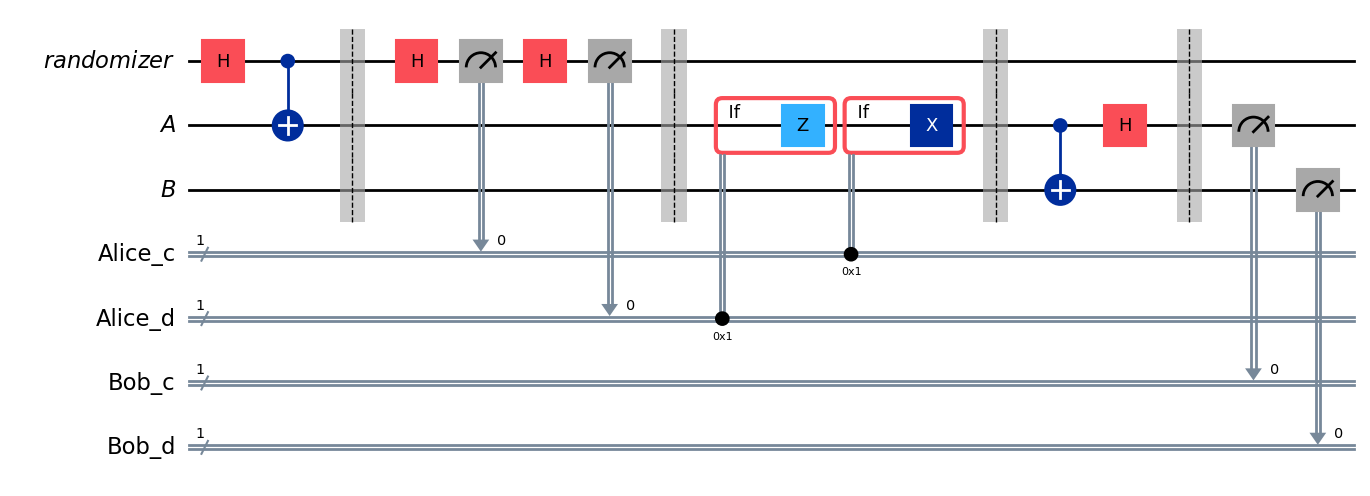

In [6]:
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="A"):
    test.x(ebit0)
test.barrier()


#bobs actions


test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()


Bob_c = ClassicalRegister(1, 'Bob_c')
Bob_d = ClassicalRegister(1, 'Bob_d')
test.add_register(Bob_c)
test.add_register(Bob_d)
test.measure(ebit0, Bob_c)
test.measure(ebit1, Bob_d)

display(test.draw('mpl'))

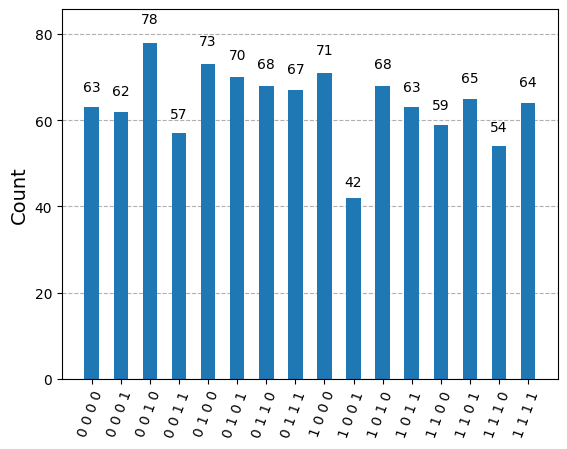

In [7]:
result = AerSimulator().run(test).result()
statists = result.get_counts()
display(plot_histogram(statists))